### Import Libraries

In [2]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Load Dataset

In [3]:
#loading the dataset
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Select x and y

In [4]:
#selecting X and Y
X = df.iloc[:, [2, 3]].values
Y = df.iloc[:, 4].values

print(X[:3, :])
print('-'*15)
print(Y[:3])

[[   19 19000]
 [   35 20000]
 [   26 43000]]
---------------
[0 0 0]


### Split the data

In [5]:
#splitting the data as 75% for training and 25% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

print(X_train[:3])
print('-'*15)
print(Y_train[:3])
print('-'*15)
print(X_test[:3])
print('-'*15)
print(Y_test[:3])

[[    44  39000]
 [    32 120000]
 [    38  50000]]
---------------
[0 1 0]
---------------
[[   30 87000]
 [   38 50000]
 [   35 75000]]
---------------
[0 0 0]


### data preprocessing

In [6]:
#data preprocessing
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print(X_train[:3])
print('-'*15)
print(X_test[:3])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]]
---------------
[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]]


### Logistic Regression

In [7]:
#build logistic regression model
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, solver='lbfgs' )
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

print(X_test[:10])
print('-'*15)
print(Y_pred[:10])

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]]
---------------
[0 0 0 0 0 0 0 1 0 1]


In [8]:
#observe y_test and y_predict
print(Y_pred[:20])
print(Y_test[:20])

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]


### Confusion Matrix

In [9]:
#computing the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

# TP FP
# FN TN

[[65  3]
 [ 8 24]]


In [10]:
#calculating precision
precision=cm[0][0]/(cm[0][0]+cm[0][1])
print(precision)

#precision=TP/(TP+FP)

0.9558823529411765


In [11]:
#calculating accuracy
total=cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
accuracy=(cm[0][0]+cm[1][1])/total
print(accuracy*100, "%")

#accuracy=(TP+TN)/Total

89.0 %


In [12]:
#calculating error rate
error=(cm[0][1]+cm[1][0])/total
print(error*100, "%")

#error rate=(FP+FN)/Total

11.0 %


In [13]:
#calculating recall
recall=cm[0][0]/(cm[0][0]+cm[1][0])
print(recall)

#recall=TP/(TP+FN)

0.8904109589041096


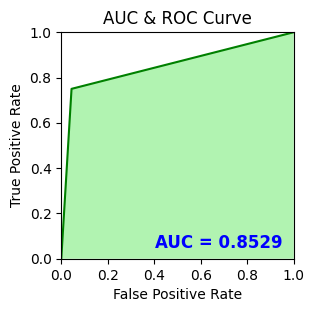

In [33]:
#auc-roc curve
from sklearn import metrics
auc = metrics.roc_auc_score(Y_test, Y_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(Y_test, Y_pred)

plt.figure(figsize=(3, 3), dpi=100)

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()